In [1]:
from os.path import dirname, join, abspath
import transforms3d.quaternions as quaternions
import transforms3d.euler as euler
import pandas as pd 
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2
import pickle
import pywt
from numpy import random

from pathlib import Path
import os,sys
import os.path

In [2]:
from keypoint_detection import Keypoint_detector
kp_detector = Keypoint_detector(weights_path="pretrained_weights/baxter/pose_cfg_test.yamlsnapshot-1030000" , 
                                config="pretrained_weights/baxter/pose_cfg_test.yaml")

DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)
Running the weights: pretrained_weights/baxter/pose_cfg_test.yamlsnapshot-1030000


/home/jingpei/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-21 16:04:38.869794: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-21 16:04:38.919702: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-21 16:04:38.924242: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had ne

In [3]:
file_name = "../dataset/baxter_poses/images/100.png"
img = cv2.imread(file_name)
imgScale = 1 #0.25
newX,newY = img.shape[1]*imgScale, img.shape[0]*imgScale
resized_img = cv2.resize(img,(int(newX),int(newY)))

results = kp_detector.predict_single_image(resized_img)
#results = results[[0,1,2,3,4,5,6]]
points_predicted = results[:,:2] * 1 #4
points_predicted = points_predicted.astype(int)
scores = results[:,2]
img = kp_detector.overwrite_image(img, points_predicted, scores)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

2021-12-21 16:04:40.515615: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8100


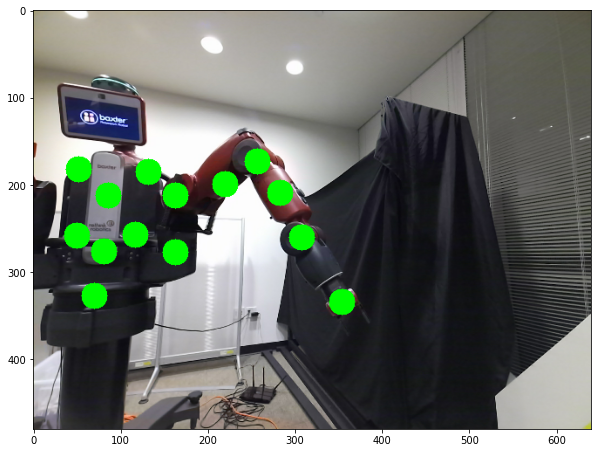

In [4]:
%matplotlib inline  
plt.figure(figsize = (10,10))
plt.imshow(img)

In [12]:
points_predicted

array([[163, 277],
       [163, 212],
       [220, 199],
       [257, 173],
       [283, 209],
       [308, 260],
       [354, 334]])

In [5]:
import glob
img_list = glob.glob("../dataset/baxter_poses/images/*.png")
img_list.sort(key=lambda f:int(f.split("/")[-1].split(".")[-2]))

In [6]:
img_list

['../dataset/baxter_poses/images/0.png',
 '../dataset/baxter_poses/images/1.png',
 '../dataset/baxter_poses/images/2.png',
 '../dataset/baxter_poses/images/3.png',
 '../dataset/baxter_poses/images/4.png',
 '../dataset/baxter_poses/images/5.png',
 '../dataset/baxter_poses/images/6.png',
 '../dataset/baxter_poses/images/7.png',
 '../dataset/baxter_poses/images/8.png',
 '../dataset/baxter_poses/images/9.png',
 '../dataset/baxter_poses/images/10.png',
 '../dataset/baxter_poses/images/11.png',
 '../dataset/baxter_poses/images/12.png',
 '../dataset/baxter_poses/images/13.png',
 '../dataset/baxter_poses/images/14.png',
 '../dataset/baxter_poses/images/15.png',
 '../dataset/baxter_poses/images/16.png',
 '../dataset/baxter_poses/images/17.png',
 '../dataset/baxter_poses/images/18.png',
 '../dataset/baxter_poses/images/19.png',
 '../dataset/baxter_poses/images/20.png',
 '../dataset/baxter_poses/images/21.png',
 '../dataset/baxter_poses/images/22.png',
 '../dataset/baxter_poses/images/23.png',
 '

In [7]:
predictions = np.zeros((len(img_list),14,2))

for i in range(len(img_list)):
    file_name = img_list[i]
    img = cv2.imread(file_name)
    imgScale = 1
    newX,newY = img.shape[1]*imgScale, img.shape[0]*imgScale
    resized_img = cv2.resize(img,(int(newX),int(newY)))

    results = kp_detector.predict_single_image(resized_img)
    points_predicted = results[:,:2] * 4
    points_predicted = points_predicted.astype(int)
    predictions[i] = points_predicted

In [8]:
np.save("baxter_poses_2d_keypoints.npy",predictions)

In [9]:

predictions = np.load("baxter_poses_2d_keypoints.npy")

In [10]:
predictions

array([[[ 649., 1110.],
        [ 659.,  825.],
        [ 864.,  902.],
        ...,
        [ 469., 1028.],
        [ 200., 1032.],
        [ 282., 1310.]],

       [[ 649., 1109.],
        [ 659.,  823.],
        [ 864.,  901.],
        ...,
        [ 468., 1028.],
        [ 200., 1033.],
        [ 281., 1309.]],

       [[ 650., 1109.],
        [ 659.,  825.],
        [ 864.,  900.],
        ...,
        [ 470., 1028.],
        [ 202., 1032.],
        [ 281., 1308.]],

       ...,

       [[ 655., 1117.],
        [ 677.,  832.],
        [ 942.,  892.],
        ...,
        [ 464., 1034.],
        [ 198., 1034.],
        [ 289., 1311.]],

       [[ 654., 1116.],
        [ 678.,  831.],
        [ 943.,  892.],
        ...,
        [ 463., 1033.],
        [ 197., 1034.],
        [ 289., 1311.]],

       [[ 654., 1118.],
        [ 677.,  833.],
        [ 942.,  891.],
        ...,
        [ 463., 1034.],
        [ 197., 1035.],
        [ 287., 1312.]]])

In [14]:
# initial guess of intrinsic camera
P = np.array([[9.42658407e+02,  0.00000000e+00,  1.02400000e+03],
       [ 0.00000000e+00, 9.42658407e+02,  7.68000000e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

# baxter FK
from baxter_fk import Baxter_FK
baxter = Baxter_FK("keypoint_config.json")

feature_ids = [0,21,22,23,24,25,26,27]

# keypoint 3d position
points_3d = np.zeros((1,3))
for i in feature_ids:
    points_3d = np.vstack((points_3d,baxter.get_3d_position_to_bl(i,[0,0,0,0,0,0,0]).reshape(-1)[:3]))
points_3d = points_3d[1:,:].astype(np.float32)

In [15]:
prediction_poses = np.zeros((predictions.shape[0],4,4))
prediction_vecs = np.zeros((predictions.shape[0],6))
for i in range(predictions.shape[0]):

    # keypoint 2d position
    points_predicted = predictions[i]
    points_2d = points_predicted[[0,7,8,9,10,11,12,13]]

    # using EPnP to find the cam-to-base transform
    retval,rvec,tvec = cv2.solvePnP(points_3d,points_2d.astype(float),P,distCoeffs = None, flags = 1)
    R,_ = cv2.Rodrigues(rvec)
    
    prediction_vecs[i,:3] = rvec.reshape(-1)
    prediction_vecs[i,3:] = tvec.reshape(-1)

    pose = np.hstack((R,tvec))
    pred_pose = np.vstack((pose,[0,0,0,1]))
    prediction_poses[i] = pred_pose

In [16]:
prediction_poses

array([[[ 0.97843973,  0.19087091, -0.07889223, -0.38853735],
        [-0.13444514,  0.29866156, -0.94484167,  0.33340106],
        [-0.15678071,  0.93507731,  0.317884  ,  0.95112805],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[ 0.97700134,  0.19889069, -0.07688221, -0.38861337],
        [-0.13461676,  0.29568605, -0.94575266,  0.33291452],
        [-0.1653684 ,  0.93435125,  0.31565969,  0.95084129],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[ 0.97803707,  0.19219965, -0.0806398 , -0.38717895],
        [-0.13717399,  0.30225483, -0.94330553,  0.33254348],
        [-0.15692922,  0.93364946,  0.32198122,  0.95020649],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       ...,

       [[ 0.98358171,  0.16985621, -0.06095803, -0.3934972 ],
        [-0.10819247,  0.28467398, -0.9524994 ,  0.34015799],
        [-0.14443477,  0.9434562 ,  0.29837728,  0.95817728],
        [ 0.        ,  0.        ,  0.        ,  1.

In [9]:
np.save("baxter_wobbler_extrinsic.npy",prediction_vecs)
np.save("baxter_wobbler_intrinsic.npy",P)

In [19]:
prediction_poses = np.zeros((4,4))
i = 0
# keypoint 2d position
points_predicted = predictions[i]
points_2d = points_predicted[[0,7,8,9,10,11,12,13]]

# using EPnP to find the cam-to-base transform
retval,rvec,tvec = cv2.solvePnP(points_3d,points_2d.astype(float),P,distCoeffs = None, flags = 1)
R,_ = cv2.Rodrigues(rvec)

prediction_vecs[i,:3] = rvec.reshape(-1)
prediction_vecs[i,3:] = tvec.reshape(-1)

pose = np.hstack((R,tvec))
pred_pose = np.vstack((pose,[0,0,0,1]))
prediction_poses = pred_pose

In [20]:
prediction_poses

array([[ 0.97843973,  0.19087091, -0.07889223, -0.38853735],
       [-0.13444514,  0.29866156, -0.94484167,  0.33340106],
       [-0.15678071,  0.93507731,  0.317884  ,  0.95112805],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [6]:
import numpy as np

In [9]:
np.load("outputs/baxter_poses_extrinsic.npy")

array([ 1.24911034,  0.05175292, -0.21615593, -0.38853735,  0.33340106,
        0.95112805])